# **Install libraries**

In [1]:
########## desktop ##########
# conda create -n csf Python=3.7
# conda activate csf

# # install pytorch with GPU accelerated
# pip install torch==2.0.0+cu117 torchvision==0.15.1+cu117 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu117

# # install sentencepiece for multi-lingual modeling
# pip install omegaconf 
# pip install hydra-core 
# pip install sentencepiece
# pip install fairseq

# # install huggingface libraries
# pip install transformers==4.28.0 
# pip install datasets evaluate
# pip install --upgrade accelerate

# # install additional packages
# pip install protobuf==3.20.3
# pip install absl-py rouge_score nltk
# pip install GitPython
# pip install numpy pandas tqdm matplotlib seaborn prettytable 

# pip install ipykernel
# pip install ipywidgets
# python -m ipykernel install --user --name csf --display-name "Python (csf)"

In [2]:
########## kaggle ##########
!pip install transformers==4.28.0 
!pip install datasets sentencepiece evaluate rouge_score 
!pip install --upgrade accelerate 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.0 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transformers-4.29.2:
      Successfully uninstalled transformers-4.29.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=ab5f1971da94fcdec8c3760ba340f530711fd2d9e1bdd46b399d7b34b8d10d9a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.12.0
    Uninstalling accelerate-0.12.0:
      Successfully uninstalled accelerate-0.12.0


# **Load xlsum datase**

Here I use XL-Sum Bengali dataset in Hugging Face, which is the annotated article-summary pairs in BBC news corpus.

- This dataset has 8102 samples for training.
- This dataset has 1012 samples for testing.
- This dataset has 1012 samples for validation.

In [3]:
from datasets import load_dataset

ds = load_dataset('csebuetnlp/xlsum', 'bengali')

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/bengali/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 8102
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 1012
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 1012
    })
})

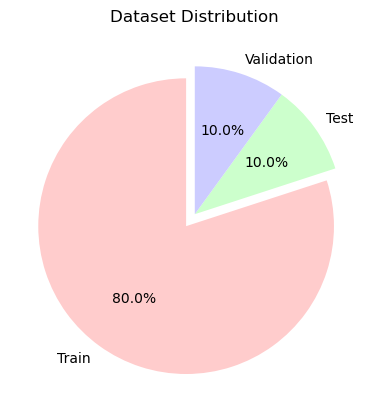

In [60]:
import matplotlib.pyplot as plt

# Dataset information
dataset_dict = ds

# Extracting the dataset sizes
train_size = dataset_dict['train'].num_rows
test_size = dataset_dict['test'].num_rows
validation_size = dataset_dict['validation'].num_rows

# Pie chart data
sizes = [train_size, test_size, validation_size]
labels = ['Train', 'Test', 'Validation']
colors = ['#FFCCCC', '#CCFFCC', '#CCCCFF']
explode = (0.1, 0, 0)  # Explode the first slice (Train) for emphasis

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Dataset Distribution')

# Set a white background color for the figure
fig.patch.set_facecolor('white')

# Saving the pie chart as a JPG image
plt.savefig('dataset_pie_chart.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

- Unlike WikiLingua dataset, xlsum dataset has abstractive summarization as follows. 
- On the other hand, WikuLingua has extractive summarization.
![abstractive vs. extractive](https://uploads-ssl.webflow.com/62ab5c229babcf02f79fbd7d/63bd8a1f20da862484184fdb_blog%20extractive%20.png)

In [5]:
ds['train'][50]

{'id': 'news-55204351',
 'url': 'https://www.bbc.com/bengali/news-55204351',
 'title': 'নূর হোসেন: এরশাদ বিরোধী মিছিলে বুকে-পিঠে শ্লোগান লেখা বিক্ষোভকারীর সেই ছবির নেপথ্য কাহিনী',
 'summary': 'তিরিশ বছর আগে ১৯৯০ সালের ৬ই ডিসেম্বর এক তীব্র গণআন্দোলনের মুখে বাংলাদেশে জেনারেল এরশাদের নয় বছরের শাসনের অবসান ঘটে। কিন্তু তারও তিন বছর আগে আরেকটি গণআন্দোলন তিনি নিষ্ঠুরভাবে দমন করেছিলেন। সেই আন্দোলনের সময় গণতন্ত্রের দাবিতে বুকে-পিঠে শ্লোগান লিখে রাস্তায় নামা এক তরুণ নূর হোসেন পুলিশের গুলিতে নিহত হন। মৃত্যুর আগে তোলা তার একটি ছবি বাংলাদেশের গণতান্ত্রিক আন্দোলনের প্রতীক হয়ে উঠে এবং তিন বছর পরের গণআন্দোলনকে অনুপ্রাণিত করে। ১৯৮৭ সালের ১০ নভেম্বর নূর হোসেনের বুলেটবিদ্ধ দেহ যে কারাকক্ষে ফেলে রাখা হয়, তার পাশের কক্ষে বন্দী ছিলেন বিবিসি বাংলার মোয়াজ্জেম হোসেন। তেত্রিশ বছর পর নূর হোসেনের সেই অভিনব প্রতিবাদের নেপথ্যে কাহিনী জানার চেষ্টা করেছেন তিনি।',
 'text': '১৯৮৭ সালের ১০ই নভেম্বর মৃত্যুর অল্প সময় আগে তোলা নূর হোসেনের ছবি। ১০ নভেম্বর, ১৯৮৭ সাল। শাহবাগ, পুলিশ কন্ট্রোল রুম। ঝাঁকড়া চুলের শ্যামলা র

# **Preprocess**
- To generate inputs for fine-tuning, now we should tokenize text into ids.
- First, we should prepare a tokenizer in pre-trained mT5 model.

In [6]:
import os
import git

# download pre-trained model 
path = os.path.abspath('./repository')

if os.path.exists(path):
    print("Folder already exist!")
else:
    os.makedirs(path)
    print("Folder successfully created!")
    git.Git(path).clone('https://huggingface.co/google/mt5-small')
    print("Repository successfully cloned!")

Folder already exist!


In [7]:
from transformers import AutoTokenizer

t5_tokenizer = AutoTokenizer.from_pretrained("./repository/mt5-small")

/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:454: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Now we convert text to token ids (the sequence of integer) as follows. The generated inputs (tokenized_ds) will have token ids for article text and summary text, each of which is in input_ids and labels, respectively.

In [8]:
def tokenize_sample_data(data):
    # Max token size is 14536 and 215 for inputs and labels, respectively.
    # Here I restrict these token size.
    input_feature = t5_tokenizer(data["text"], truncation=True, max_length=1024)
    label = t5_tokenizer(data["summary"], truncation=True, max_length=128)
    return {
        "input_ids": input_feature["input_ids"],
        "attention_mask": input_feature["attention_mask"],
        "labels": label["input_ids"],
    }

tokenized_ds = ds.map(
    tokenize_sample_data,
    remove_columns=["id", "url", "title", "summary", "text"],
    batched=True,
    batch_size=128
)

tokenized_ds

  0%|          | 0/64 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 8102
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1012
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1012
    })
})

# **Load model and data collator**
Before fine-tuning, load pre-trained model and data collator.

In HuggingFace, several sizes of mT5 models are available, and here I’ll use small one (google/mt5-small) to fit to memory in our machine.
The name is “small”, but it’s still pretty large (over 1 GB).

In [9]:
import torch
from transformers import AutoConfig, AutoModelForSeq2SeqLM

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# see https://huggingface.co/docs/transformers/main_classes/configuration
mt5_config = AutoConfig.from_pretrained(
    "./repository/mt5-small",
    max_length=128,
    length_penalty=0.6,
    no_repeat_ngram_size=2,
    num_beams=15,
)

model = (AutoModelForSeq2SeqLM
         .from_pretrained("./repository/mt5-small", config=mt5_config)
         .to(device))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

- For the sequence-to-sequence (seq2seq) task, we need to not only stack the inputs for encoder, but also prepare for the decoder side. 
- In seq2seq setup, a common technique called “teach forcing” will then be applied in decoder.
- In Hugging Face, these tasks are not needed to be manually setup and the following DataCollatorForSeq2Seq will take care of all steps.

In [10]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(
    t5_tokenizer,
    model=model,
    return_tensors="pt"
)

- In this collator, the padded token will also be filled with label id -100.
- This token will then be ignored in the sebsequent loss computation and evaluation.

# **Metrics for Text Generation**
For instance, two sentences, “This is my book” and “The book is mine”, matches no tokens in each position, but it has similar meaning.
Measuring the quality of generated text is very difficult unlike classification tasks, such as, document classification, NER, or sentiment analysis.
BLEU and ROUGE are often used for measuring the quality of generated text.

Briefly speaking, BLEU measures how many of n-gram tokens in the generated (predicted) text are overlaped in the reference text. This score is used for evaluation, especially in the machine translation.
However, in summarization, we want all important words (which appears on the reference text) in the generated text. This is because we often use ROUGE metrics in summarization tasks.

The idea of ROUGE is similar to BLEU, but it also measures how many of n-gram tokens in the reference text appears in the generated (predicted) text. (This is why the name of ROUGE includes “RO”, which means “Recall-Oriented”.)
There also exist variations, ROUGE-L and ROUGE-Lsum, which also counts the longest common substrings (LCS) in ROUGE metrics computation.

With Hugging Face libraries, you can use built-in objects for scoring ROUGE metrics without needing to manually implement these logics. (See below.)
In this example, we should configure custom tokenization in metrics computation, because we need to process languages which don’t have an explicit space tokenization. (Otherwise, white space tokenization is used as default in ROUGE evaluation.)
Please change the following code for sentence break, when you use other languages except for Bengali. (Here I use Bengali punctuation “।” for sentence break.)

In [11]:
import evaluate
import numpy as np
from nltk.tokenize import RegexpTokenizer

rouge_metric = evaluate.load("rouge")

# define function for custom tokenization
def tokenize_sentence(arg):
    encoded_arg = t5_tokenizer(arg)
    return t5_tokenizer.convert_ids_to_tokens(encoded_arg.input_ids)

# define function to get ROUGE scores with custom tokenization
def metrics_func(eval_arg):
    preds, labels = eval_arg

    # Replace -100
    labels = np.where(labels != -100, labels, t5_tokenizer.pad_token_id)
    # Convert id tokens to text

    text_preds = t5_tokenizer.batch_decode(preds, skip_special_tokens=True)
    text_labels = t5_tokenizer.batch_decode(labels, skip_special_tokens=True)
    # Insert a line break (\n) in each sentence for ROUGE scoring

    # (Note : Please change this code, when you perform on other languages except for Bengali)
    text_preds = [(p if p.endswith(("!", "!", "?", "?", "।")) else p + "।") for p in text_preds]
    text_labels = [(l if l.endswith(("!", "!", "?", "?", "।")) else l + "।") for l in text_labels]
    sent_tokenizer_bn = RegexpTokenizer(u'[^!!??।]*[!!??।]')
    text_preds = ["\n".join(np.char.strip(sent_tokenizer_bn.tokenize(p))) for p in text_preds]
    text_labels = ["\n".join(np.char.strip(sent_tokenizer_bn.tokenize(l))) for l in text_labels]

    # compute ROUGE score with custom tokenization
    return rouge_metric.compute(
    predictions=text_preds,
    references=text_labels,
    tokenizer=tokenize_sentence
    )

 Now let’s get ROUGE score for the plain mT5 model which is not trained for summarization.

In [12]:
from torch.utils.data import DataLoader

sample_dataloader = DataLoader(
    tokenized_ds["test"].with_format("torch"),
    collate_fn=data_collator,
    batch_size=5
)

for batch in sample_dataloader:
    with torch.no_grad():
        preds = model.generate(
            batch["input_ids"].to(device),
            num_beams=15,
            num_return_sequences=1,
            no_repeat_ngram_size=1,
            remove_invalid_values=True,
            max_length=128
        )
    labels = batch["labels"]
    break

metrics_func([preds, labels])

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


{'rouge1': 0.09688197030477126,
 'rouge2': 0.04008293971384077,
 'rougeL': 0.09688197030477126,
 'rougeLsum': 0.09656565656565655}

See below for details about BLEU and ROUGE metrics in HuggingFace.

Metric: bleu
https://huggingface.co/spaces/evaluate-metric/bleu

Metric: rouge
https://huggingface.co/spaces/evaluate-metric/rouge

# **Fine-Tuning for Summarization**
Now let’s configure and run fine-tuning.
In this example, we use HuggingFace transformer trainer class, with which you can run training without manually writing training loop.

First we prepare HuggingFace training arguments.

- In usual training evaluation, training loss and accuracy will be computed and evaluated, by comparing the generated logits with labels. - However, as we saw above, we want to evaluate ROUGE score using the predicted tokens.
- To simplify these sequence-to-sequence specific steps, here I use built-in Seq2SeqTrainingArguments and Seq2SeqTrainer classes, instead of usual TrainingArguments and Trainer.
- By setting predict_with_generate=True as follows in this class, the predicted tokens will be generated by model.generate() and it will then be passed into evaluation function.

In [13]:
from transformers import Seq2SeqTrainingArguments

lr=5e-4
epochs=10

training_args = Seq2SeqTrainingArguments(
    output_dir = "../model/mt5-summarize-bn",
    num_train_epochs = epochs,
    evaluation_strategy = "steps",
    eval_steps = 100,
    learning_rate = lr,
    lr_scheduler_type = "linear",
    warmup_steps = 90,
    optim = "adafactor",
    weight_decay = 0.01,
    per_device_train_batch_size = 2,
    per_device_eval_batch_size = 1,
    gradient_accumulation_steps = 16,
    predict_with_generate=True,
    generation_max_length = 128,
    save_steps = 500,
    logging_steps = 10,
    push_to_hub = False
)

- In this training arguments (above), there’s also another trick.
Because model (and data) is still so large, I then set the batch size to 2. You might think that this small batch size will prevent from stable convergence.

- To avoid this problem, I have used gradient_accumulation_steps, which is a technique to aggregate the gradients from small batches.

- Now let’s put it all together into trainer class and run fine-tuning as follows. As I have mentioned above, you don’t need to manually write training loop. (Seq2SeqTrainer class will do all steps.)

In [14]:
# from transformers import Seq2SeqTrainer

# trainer = Seq2SeqTrainer(
#   model = model,
#   args = training_args,
#   data_collator = data_collator,
#   compute_metrics = metrics_func,
#   train_dataset = tokenized_ds["train"],
#   eval_dataset = tokenized_ds["validation"].select(range(20)),
#   tokenizer = t5_tokenizer,
# )

# trainer.train()

# 089a6f005f2f73c678d9ff454d3c0b291cd2bee0

## **Save**

In [15]:
# import os
# import pandas as pd

# save_dir = './models/mt5-summarize-bn'
# os.makedirs(save_dir, exist_ok=True)

In [16]:
# # save training log
# df = pd.DataFrame(trainer.state.log_history)
# df.to_csv(os.path.join(save_dir, 'training_log.csv'))

# # save fine-tuned model
# if hasattr(trainer.model, "module"):
#     trainer.model.module.save_pretrained(save_dir)
# else:
#     trainer.model.save_pretrained(save_dir)

# **Load**

In [17]:
from transformers import AutoModelForSeq2SeqLM

load_dir = './models/mt5-summarize-bn'

# load fine-tuned model
model = (AutoModelForSeq2SeqLM
         .from_pretrained(load_dir)
         .to(device))

In [18]:
import os
import pandas as pd

# load training log
df = pd.read_csv(os.path.join(load_dir, 'training_log.csv'))

# **Performance Analysis**

In [19]:
df_eval = df[[ 
    'epoch', 
    'step', 
    'eval_loss', 
    'eval_rouge1', 
    'eval_rouge2', 
    'eval_rougeL', 
    'eval_rougeLsum',
    ]].dropna()
df_eval

,epoch,step,eval_loss,eval_rouge1,eval_rouge2,eval_rougeL,eval_rougeLsum
10,0.39,100,2.521615,0.253198,0.126434,0.221080,0.221244
21,0.79,200,2.233467,0.290058,0.167398,0.252119,0.254422
32,1.18,300,2.173132,0.308318,0.176033,0.248915,0.249198
43,1.58,400,2.145608,0.298202,0.165219,0.242713,0.244387
54,1.97,500,2.125814,0.284863,0.166022,0.244357,0.244086
65,2.37,600,2.128960,0.301872,0.181137,0.254142,0.256291
76,2.76,700,2.098353,0.289283,0.159879,0.237195,0.238950
87,3.16,800,2.079969,0.299827,0.166527,0.248808,0.253686
98,3.55,900,2.069368,0.294211,0.173041,0.250432,0.252340
109,3.95,1000,2.080842,0.282009,0.150509,0.232890,0.235733


# **Plots**

In [20]:
from  matplotlib import pyplot as plt

In [21]:
df_loss = df['loss']
df_loss = df_loss.dropna()
df_loss

0      21.0914
1      17.0002
2      11.3206
3       5.7555
4       4.5438
        ...   
272     2.0015
273     2.0311
275     2.0120
276     1.9757
277     2.0591
Name: loss, Length: 253, dtype: float64

In [22]:
df_step = df['step']
df_step = df_step[~df_step.duplicated(keep='first')]
df_step

0        10
1        20
2        30
3        40
4        50
       ... 
272    2490
273    2500
275    2510
276    2520
277    2530
Name: step, Length: 253, dtype: int64

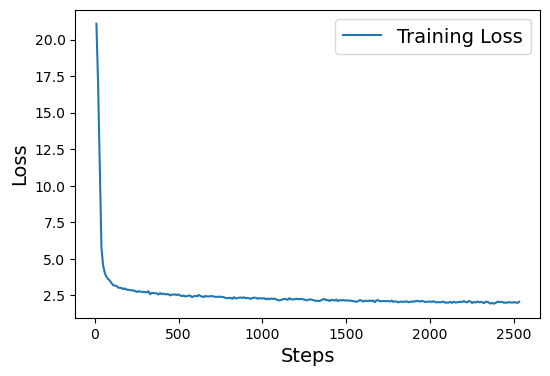

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))

df_loss = df['loss']
df_loss = df_loss.dropna()

df_step = df['step']
df_step = df_step[~df_step.duplicated(keep='first')]

plt.plot(df_step, df_loss)
plt.legend(['Training Loss'], loc='upper right', fontsize='14')
plt.xlabel('Steps', fontsize='14')
plt.ylabel('Loss', fontsize='14')
plt.show()

fig = ax.get_figure()
fig.savefig(os.path.join(load_dir, 'training_loss.png'), bbox_inches='tight')

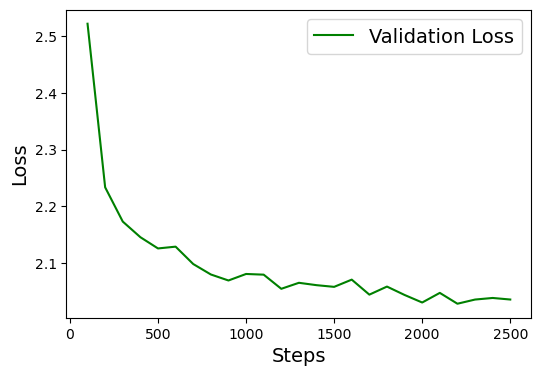

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))

plt.plot(df_eval['step'], df_eval['eval_loss'], color='green')
plt.legend(['Validation Loss'], loc='upper right', fontsize='14')
plt.xlabel('Steps', fontsize='14')
plt.ylabel('Loss', fontsize='14')
plt.show()

fig = ax.get_figure()
fig.savefig(os.path.join(load_dir, 'validation_loss.png'), bbox_inches='tight')

# **Training Time**

In [25]:
df_backup = df

# training time 
last_row = df_backup.iloc[-1]
column_value = last_row['train_runtime']

# convert seconds to hours, minutes, and seconds
hours = int(column_value // 3600)
seconds_remaining = column_value % 3600
minutes = int(seconds_remaining // 60)
seconds = int(seconds_remaining % 60)

# print training time
print(f"Training Time: {hours}:{minutes}:{seconds}")

Training Time: 2:2:47


In [61]:
df_backup = df

# Total training time
last_row = df_backup.iloc[-1]
total_runtime = last_row['train_runtime']

# Convert total runtime to hours, minutes, and seconds
total_hours = int(total_runtime // 3600)
total_seconds_remaining = total_runtime % 3600
total_minutes = int(total_seconds_remaining // 60)
total_seconds = int(total_seconds_remaining % 60)

# Format and print total training time
total_training_time = f"Total Training Time: {total_hours}:{total_minutes:02d}:{total_seconds:02d}"
print(total_training_time)

# Number of epochs
num_epochs = 10  # Replace with the actual number of epochs

# Calculate individual runtime per epoch
epoch_runtime = total_runtime / num_epochs

# Convert epoch runtime to hours, minutes, and seconds
epoch_hours = int(epoch_runtime // 3600)
epoch_seconds_remaining = epoch_runtime % 3600
epoch_minutes = int(epoch_seconds_remaining // 60)
epoch_seconds = int(epoch_seconds_remaining % 60)

# Format and print individual runtime per epoch
epoch_time = f"Individual Runtime per Epoch: {epoch_hours}:{epoch_minutes:02d}:{epoch_seconds:02d}"
print(epoch_time)

Total Training Time: 2:02:47
Individual Runtime per Epoch: 0:12:16


# **Generate Text (Summarize Bengali Text)**
- The following code generates text for summarization with fine-tuned model.
- Here I generate the summarized text with test data, which has not seen in the training set.

In [26]:
from torch.utils.data import DataLoader

# Predict with test data (first 5 rows)
sample_dataloader = DataLoader(
  tokenized_ds["test"].with_format("torch"),
  collate_fn=data_collator,
  batch_size=5
)

for batch in sample_dataloader:
    with torch.no_grad():
        preds = model.generate(
        batch["input_ids"].to(device),
        num_beams=15,
        num_return_sequences=1,
        no_repeat_ngram_size=1,
        remove_invalid_values=True,
        max_length=128,
        )
    labels = batch["labels"]
    break
    
metrics_func([preds, labels])

{'rouge1': 0.3389541827624788,
 'rouge2': 0.18485985097659563,
 'rougeL': 0.2646563633935923,
 'rougeLsum': 0.27243365330321856}

In [27]:
# Replace -100 (see above)
labels = np.where(labels != -100, labels, t5_tokenizer.pad_token_id)

# Convert id tokens to text
text_preds = t5_tokenizer.batch_decode(preds, skip_special_tokens=True)
text_labels = t5_tokenizer.batch_decode(labels, skip_special_tokens=True)

# Show result
print("***** Input's Text *****")
print(ds["test"]["text"][2])
print("***** Summary Text (True Value) *****")
print(text_labels[2])
print("***** Summary Text (Generated Text) *****")
print(text_preds[2])

***** Input's Text *****
সোহরাওয়ার্দী হাসপাতালের চিত্র সাধারণত সেপ্টেম্বর পর্যন্ত ডেঙ্গুর এই প্রকোপ দেখা যায়। ডেঙ্গুতে আক্রান্ত হয়ে প্রতিদিনই অসংখ্য মানুষ চিকিৎসার জন্য দেশের বিভিন্ন হাসপাতালে ছুটছেন। ডেঙ্গু পরিস্থিতি সামাল দিতে হিমশিম খাচ্ছে রাজধানীর সরকারি- বেসরকারি সব ধরনের হাসপাতাল। এমন অবস্থায় পরিস্থিতি সামাল দিতে বিভিন্ন ধরণের পদক্ষেপের কথা জানিয়েছেন বাংলাদেশের স্বাস্থ্য অধিদপ্তরের মহাপরিচালক আবুল কালাম আজাদ। তিনি বলেন, "খুব বেসামাল পরিস্থিতি তৈরি হয়নি। তবে ডেঙ্গু নিয়ে যেহেতু আতঙ্ক তৈরি হয়েছে, তাই অনেকেই আছেন যাদের হাসপাতালে ভর্তি হওয়ার দরকার নাই, কিন্তু তারা হাসপাতালে ভর্তি হতে চাচ্ছেন।" "আর ডাক্তারদের উপরও মানসিক একটা চাপ তৈরি হয়েছে, যার কারণে তারা রোগী ভর্তি করাতে বাধ্য হন।" রাজধানী ঢাকার বেশ কয়েকটি হাসপাতাল ঘুরে দেখেছেন বিবিসির প্রতিবেদক। তিনি জানান, অনেক বেসরকারি হাসপাতালে রোগী ধারণ ক্ষমতা পূর্ণ হয়ে যাওয়ায় হাসপাতালের বাইরে সাইনবোর্ড লাগিয়ে দেয়া হয়েছে। আরো পড়তে পারেন: ডেঙ্গু নিয়ন্ত্রণে ব্যর্থতার দায় মানতে রাজি না সরকার 'কোন হাসপাতালেই জায়গা নেই, এত বেশী ড

In [28]:
import shutil

######## kaggle ########
downloads = '/kaggle/working/models'

source = downloads
destination = downloads

shutil.make_archive(destination, 'zip', source)

'/kaggle/working/models.zip'